In [1]:
import pandas as pd
import re
import datetime as dt
import numpy as np
pd.set_option("display.max_rows", 280)
pd.set_option("display.max_columns", 25)
pd.set_option("display.width", 1000)
pd.options.display.float_format = "{:,.2f}".format
import matplotlib.pyplot as plt

In [2]:
#import raw excel data
file1 = '/home/ajw/Documents/VSstudio/WellDataPBI/SAPetroleumWells.xlsx'
file2 = '/home/ajw/Documents/VSstudio/WellDataPBI/ProductionSummaryByCompletion.xlsx'

SAwells = pd.read_excel(file1)
ProductionbyCompletion = pd.read_excel(file2)
print(SAwells.shape, 'sawells')
print(ProductionbyCompletion.shape, 'completions')

(3541, 41) sawells
(2860, 18) completions


In [3]:
#Investigate SAwells.
SAwells.columns

Index(['Well', 'Security', 'Operator', 'Province', 'Spudded Date', 'Rig Release Date', 'Open File Date', 'Class', 'Type', 'Status RR', 'Review Date', 'Completion Status', 'Completion Date', 'Driller/Rig', 'Primary Objective', 'Secondary Objective', 'Licence Type', 'Licence Number', 'Second Licence Number', 'Current PPL', 'Start Depth (m)', 'Total Depth (m)', 'Ground Level (m)', 'Kelly Bushing (m)', 'Deviation', 'Height Datum', 'GDA94 Latitude', 'GDA94 Longitude', 'GDA20 Latitude', 'GDA20 Longitude', 'Name', 'Number', 'SA Geodata ID', 'Situation', 'State', 'Comments', 'Plot Symbol', 'Well ID', 'Petroleum Search Subsidy Act', 'Resource Play', 'Drilled Under Legislation'], dtype='object')

In [3]:
#drop unwanted columns
deletelist = ['Resource Play', 'Drilled Under Legislation', 'Drilled Under Legislation', 'Petroleum Search Subsidy Act', 'Comments', 'Plot Symbol',
 'SA Geodata ID', 'GDA94 Longitude', 'GDA94 Latitude', 'Deviation', 'Situation', 'State', 'Rig Release Date', 'Open File Date', 'Security', 'Deviation', 
 'Ground Level (m)', 'Height Datum', 'Review Date', 'Second Licence Number', 'Kelly Bushing (m)', 'Name', 'Number', 'Completion Date', 'Secondary Objective',
 'Status RR']

SAwells.drop(columns=deletelist, axis=1, inplace=True)

In [4]:
SAwells.columns

Index(['Well', 'Operator', 'Province', 'Spudded Date', 'Class', 'Type', 'Completion Status', 'Driller/Rig', 'Primary Objective', 'Licence Type', 'Licence Number', 'Current PPL', 'Start Depth (m)', 'Total Depth (m)', 'GDA20 Latitude', 'GDA20 Longitude', 'Well ID'], dtype='object')

In [5]:
#investigate operator values, collate all similar entities, ie Beach Energy Limited / Beach Petroleum NL/

SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*beach.*', 'Beach Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*santos.*', 'Santos Limited', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*delhi.*', 'Delhi', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*senex.*', 'Senex Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*drillsearch.*', 'Drillsearch Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*strike.*', 'Strike Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*victoria.*', 'VicPet', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*origin.*', 'Origin Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*cooper.*', 'Cooper Energy', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*stuart.*', 'Stuart Petroleum', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*bhp.*', 'BHP Petroleum', flags=re.I)
SAwells['Operator'] = SAwells['Operator'].str.replace(r'.*adelaide.*', 'Adelaide Energy', flags=re.I)
top10operators = SAwells['Operator'].value_counts().to_frame().head(10)
top10operators

,Operator
Santos Limited,1758
Delhi,476
Beach Energy,426
Senex Energy,125
SADME,74
Stuart Petroleum,52
Comalco,52
Linc Energy,50
Torrens Energy Limited,45
VicPet,27


In [6]:
#investigate null operator wells.. remove
SAwells[SAwells['Operator'].isna()]
SAwells.dropna(subset=['Operator'], axis=0, inplace=True)

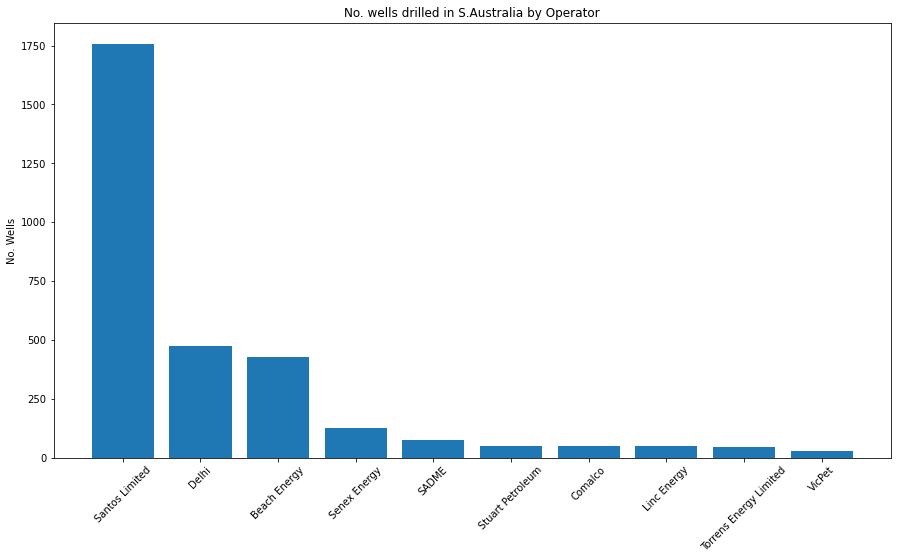

In [7]:
plt.figure(figsize=(15,8))
plt.bar(top10operators.index, height=top10operators['Operator'])
plt.xticks(rotation=45)
plt.title('No. wells drilled in S.Australia by Operator')
plt.ylabel('No. Wells')

# plt.subplots (figsize=(10, 6))
plt.show()
# plt.bar(top10operators, top10operators['Operator'])

In [8]:
#clean up completions, 
SAwells['Completion Status'].value_counts()

SAwells['Completion Status'] = SAwells['Completion Status'].str.replace(r'.*completion.*', 'Completed', flags=re.I)
SAwells['Completion Status'] = SAwells['Completion Status'].str.replace(r'.*suspended.*', 'Completed', flags=re.I)
SAwells['Completion Status'].value_counts(dropna=False)

Completed                       1898
Abandoned                        857
NaN                              679
UCG Investigation/Monitoring      16
Sales Gas Storage Injector        10
Water Well                         6
Water Injector                     4
UCG Process                        3
Under Review                       1
Name: Completion Status, dtype: int64

In [9]:
SAwells['Primary Objective'].value_counts().to_frame().head(40)

SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*patch.*', 'Patchawarra Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*namur.*', 'Namur Sst', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*tool.*', 'Toolachee Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*birk.*', 'Birkhead Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*tirra.*', 'Tirrawarra Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*hutton.*', 'Hutton Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*pool.*', 'Poolowanna Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*coop.*', 'Cooper Gas', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*cret.*', 'Cretaceous', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*mckin.*', 'Mckinlay Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*camb.*', 'Cambrian', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*murt.*', 'Murta Fm', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*coor.*', 'Coorikiana Sst', flags=re.I)
SAwells['Primary Objective'] = SAwells['Primary Objective'].str.replace(r'.*perm.*', 'Permian', flags=re.I)
SAwells['Primary Objective'].value_counts().to_frame().head(40)

,Primary Objective
Patchawarra Fm,763
Cooper Gas,527
Confidential,375
Namur Sst,263
Toolachee Fm,190
Birkhead Fm,180
Eromanga Oil,173
Mckinlay Fm,105
Hutton Fm,96
Murta Fm,69


In [10]:
#convert lat longs to decidegs
SAwells.dropna(subset=['GDA20 Latitude'], axis=0, inplace=True)
SAwells['GDA20 Latitude'] = -1 * (SAwells['GDA20 Latitude'].str.split().str.get(0).astype('float64') + SAwells['GDA20 Latitude'].str.split().str.get(1).astype('float64')/60 + SAwells['GDA20 Latitude'].str.split().str.get(2).astype('float64')/3600)
SAwells['GDA20 Longitude'] = SAwells['GDA20 Longitude'].str.split().str.get(0).astype('float64') + SAwells['GDA20 Longitude'].str.split().str.get(1).astype('float64')/60 + SAwells['GDA20 Longitude'].str.split().str.get(2).astype('float64')/3600

In [11]:
SAwells.dtypes

Well                         object
Operator                     object
Province                     object
Spudded Date         datetime64[ns]
Class                        object
Type                         object
Completion Status            object
Driller/Rig                  object
Primary Objective            object
Licence Type                 object
Licence Number              float64
Current PPL                 float64
Start Depth (m)             float64
Total Depth (m)             float64
GDA20 Latitude              float64
GDA20 Longitude             float64
Well ID                       int64
dtype: object

In [13]:
SAwells.to_csv('/home/ajw/Documents/VSstudio/WellDataPBI/SAWells_edit.csv')

In [12]:
#clean up production data
ProductionbyCompletion.columns

Index(['Well', 'Co-Formation', 'WellID', 'Type', 'Field', 'Prod-Basin', 'Company', 'Oil (m3)', 'Water (m3)', 'Gas (m3E6)', 'Oil (bbl)', 'Water (bbl)', 'Gas (mmcf)', 'Stream Days', 'Month Days', 'First Production Date', 'Last Production Date', 'Last Submission Date'], dtype='object')

In [13]:
drop = ['Last Submission Date', 'Oil (m3)', 'Water (m3)', 'Gas (m3E6)']
ProductionbyCompletion.drop(columns=drop, axis=0, inplace=True )

In [14]:
#clean formation data
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*tool.*', 'Toolachee Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*patch.*', 'Patchawarra Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*birk.*', 'Birkhead Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*tirra.*', 'Tirrawarra Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*namur.*', 'Namur Sst', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*tinc.*', 'Tinchoo Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*hutton.*', 'Hutton Sst', flags=re.I)
ProductionbyCompletion['Co-Formation'] = ProductionbyCompletion['Co-Formation'].str.replace(r'.*mck.*', 'Mckinlay Fm', flags=re.I)
ProductionbyCompletion['Co-Formation'].value_counts().head(10)

Patchawarra Fm    822
Toolachee Fm      561
Tirrawarra Fm     275
Namur Sst         238
Mckinlay Fm       158
Murta Fm          154
Birkhead Fm       148
Hutton Sst        136
Epsilon Fm        129
Coorikiana Sst     75
Name: Co-Formation, dtype: int64

In [15]:
ProductionbyCompletion['Oil (kbbl)'] = ProductionbyCompletion['Oil (bbl)']/1000
ProductionbyCompletion['Water (kbbl)'] = ProductionbyCompletion['Water (bbl)']/1000
ProductionbyCompletion.drop(columns=['Oil (bbl)', 'Water (bbl)'], axis=0, inplace=True )

In [16]:
ProductionbyCompletion.to_csv('/home/ajw/Documents/VSstudio/WellDataPBI/ProdbyCompletion_edit.csv')
ProductionbyCompletion

,Well,Co-Formation,WellID,Type,Field,Prod-Basin,Company,Gas (mmcf),Stream Days,Month Days,First Production Date,Last Production Date,Oil (kbbl),Water (kbbl)
0,Acrasia 001,Hutton Sst,1,Oil,Acrasia,Eromanga,Senex Energy Limited,0.00,"1,117.80",6210,2003-08-31,2011-05-31,141.77,"1,324.82"
1,Acrasia 001,Tinchoo Fm,1,Oil,Acrasia,Cooper,Senex Energy Limited,0.00,623.30,6606,2002-07-31,2005-12-31,183.57,687.05
2,Acrasia 002,Paning Mbr,2,Oil,Acrasia,Cooper,Senex Energy Limited,0.00,8.70,4749,2007-08-31,2008-08-31,0.07,3.50
3,Acrasia 002,Tinchoo Fm,2,Oil,Acrasia,Cooper,Senex Energy Limited,0.00,"1,265.80",6544,2002-09-30,2013-12-31,89.19,"1,437.69"
4,Acrasia 003,Birkhead Fm,3,Oil,Acrasia,Eromanga,Senex Energy Limited,0.00,108.20,2557,2013-08-31,2014-07-31,1.35,43.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,Worrior 011,Birkhead Fm,3285,Oil,Worrior,Eromanga,Senex Energy Limited,0.00,56.60,1277,2017-02-28,2017-04-30,2.40,0.00
2856,Yalcumma 002,Patchawarra Fm,2257,Gas,Yalcumma,Cooper,Santos Limited,135.81,398.57,823,2018-05-31,2020-01-31,0.00,0.02
2857,Yapeni 001,Epsilon Fm,2263,Gas,Yapeni,Cooper,Santos Limited,"2,302.76",734.00,13210,1985-11-30,1989-03-31,0.00,82.28
2858,Yapeni 002,Patchawarra Fm,2264,Gas,Yapeni,Cooper,Santos Limited,18.69,13.12,8279,2000-01-31,1998-01-31,0.00,0.00


In [29]:
top10fms = ProductionbyCompletion.pivot_table(index='Co-Formation', values='Oil (kbbl)', aggfunc='sum').sort_values('Oil (kbbl)', ascending=False).head(10)
top10fms

,Oil (kbbl)
Co-Formation,
Namur Sst,"73,269.37"
Hutton Sst,"49,246.73"
Tirrawarra Fm,"34,006.22"
Birkhead Fm,"27,447.99"
Mckinlay Fm,"18,470.44"
Murta Fm,"17,579.48"
Patchawarra Fm,"6,591.90"
Poolowanna Fm,"5,735.56"
Tinchoo Fm,"1,470.76"


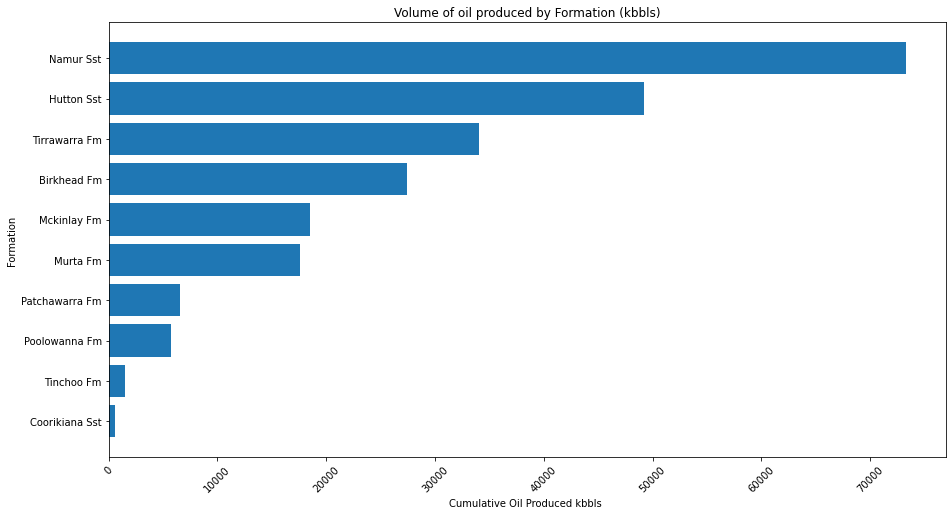

In [32]:
plt.figure(figsize=(15,8))
plt.barh(top10fms.index, width=top10fms['Oil (kbbl)'])
plt.xticks(rotation=45)
plt.title('Volume of oil produced by Formation (kbbls)')
plt.ylabel('Formation')
plt.xlabel('Cumulative Oil Produced kbbls ')
plt.gca().invert_yaxis()

# plt.subplots (figsize=(10, 6))
plt.show()
# plt.bar(top10operators, top10operators['Operator'])